# CNN for task performance comparison

#### Unzip files

In [0]:
# unzip files
import zipfile

UNZIP_NAME = 'mnist.zip'

zip_ref = zipfile.ZipFile(UNZIP_NAME, 'r')
zip_ref.extractall('./')
zip_ref.close()

## Get data

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#### Import data

In [10]:
#DATA_PATH = '/Users/anthony/Documents/Comp551_Projects/CapNET/data/mnistData.npz'
DATA_PATH = 'mnistData.npz'

npzfile = np.load(DATA_PATH)
npzfile.files

['X_train', 'y_train', 'X_test', 'y_test']

#### Unpack - take subset? 

In [13]:
TAKE_SUBSET = True
SUBSET_SIZE = 6000

# Unpack the training and testing datasets
X_train, y_train = npzfile['X_train'], npzfile['y_train']
X_test, y_test = npzfile['X_test'], npzfile['y_test']

# Take subset
if TAKE_SUBSET:
    X_train = X_train[0:SUBSET_SIZE]
    y_train = y_train[0:SUBSET_SIZE]
    
# Expand the dimension of images to signal greyscale
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(6000, 28, 28, 1)
(6000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Set up convolutional net

In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D

### Define model(s)

In [0]:
def basic_CNN():
    # Input layer
    x = Input(shape=(28,28,1))
    
    # First convolution
    conv1 = Conv2D(filters=256, kernel_size=9, strides=1,\
                          padding='valid', activation='relu')(x)
    
    # Second convolution (32 capsules * 8 dimensions: 256 individual filters equivalency )
    conv2 = Conv2D(filters=256, kernel_size=9, strides=2,\
                          padding='valid', activation='relu')(conv1)
    
    # Max pooling (instead of dynamic routing)
    pool = MaxPooling2D(pool_size=2, strides=1)(conv2)
    
    # Third convolution (10 capsules * 16 dimension: 160 individual filter equivapency)
    conv3 = Conv2D(filters=160, kernel_size=5, strides=1,\
                          padding='valid', activation='relu')(pool)
    
    # Flatten
    flat = Flatten()(conv3)
    
    # Output layer
    fc = Dense(10, activation='softmax')(flat)    
    
    # Compile model
    model = Model(x, fc)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model
    
    

In [68]:
model = basic_CNN()
model.summary()

## TODO: compare the number of parameters

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 20, 20, 256)       20992     
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 6, 6, 256)         5308672   
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 1, 1, 160)         1024160   
_________________________________________________________________
flatten_15 (Flatten)         (None, 160)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1610      
Total para

### Train model

In [69]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=60,
                    shuffle=True,
                    validation_data=(X_test, y_test)
                   )

Train on 6000 samples, validate on 10000 samples
Epoch 1/30
6000/6000 [==============================] - 11s 2ms/step - loss: 0.3964 - acc: 0.8758 - val_loss: 0.1376 - val_acc: 0.9576
Epoch 2/30
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0938 - acc: 0.9728 - val_loss: 0.0967 - val_acc: 0.9689
Epoch 3/30
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0555 - acc: 0.9825 - val_loss: 0.0790 - val_acc: 0.9769
Epoch 4/30
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0313 - acc: 0.9898 - val_loss: 0.0894 - val_acc: 0.9708
Epoch 5/30
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0247 - acc: 0.9923 - val_loss: 0.1437 - val_acc: 0.9635
Epoch 6/30
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0338 - acc: 0.9890 - val_loss: 0.0893 - val_acc: 0.9753
Epoch 7/30
6000/6000 [==============================] - 10s 2ms/step - loss: 0.0236 - acc: 0.9902 - val_loss: 0.1007 - val_acc: 0.9700
Epoch 

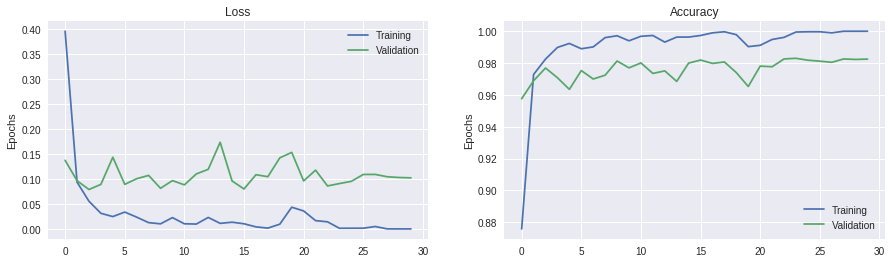

In [70]:
# Plot history
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Epochs')
plt.legend(['Training','Validation'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Epochs')
plt.legend(['Training','Validation'])

plt.show()

In [0]:
# Save training history
import pickle

SAVE_HISTORY = True
MODEL_NAME = 'CNN_simpleFF_20Epochs'


if SAVE_HISTORY:
  pickle.dump( history, open('%s_history.pickle'%MODEL_NAME, 'wb') )

